# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

#Group name:  Data Doc's
Created by NAMES (SJSU IDs)  
Leonardo Flores Gonzalez 013475436  
Christina Vo 015626312  
Sadiya Rahman 016023033
#Last updated: 9/23/25
Briefly describe your dataset:
#Our dataset explores people at risk of obesity in the US and information on them such as salary or where they live, etc.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/CS133_Project/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
# Count missing values in each column
df.isnull().sum()


,0
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
Datasource,0
Class,0
Topic,0
Question,0
Data_Value_Unit,106260
Data_Value_Type,0


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
# Show data type for each column
df.dtypes


,0
YearStart,int64
YearEnd,int64
LocationAbbr,object
LocationDesc,object
Datasource,object
Class,object
Topic,object
Question,object
Data_Value_Unit,float64
Data_Value_Type,object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

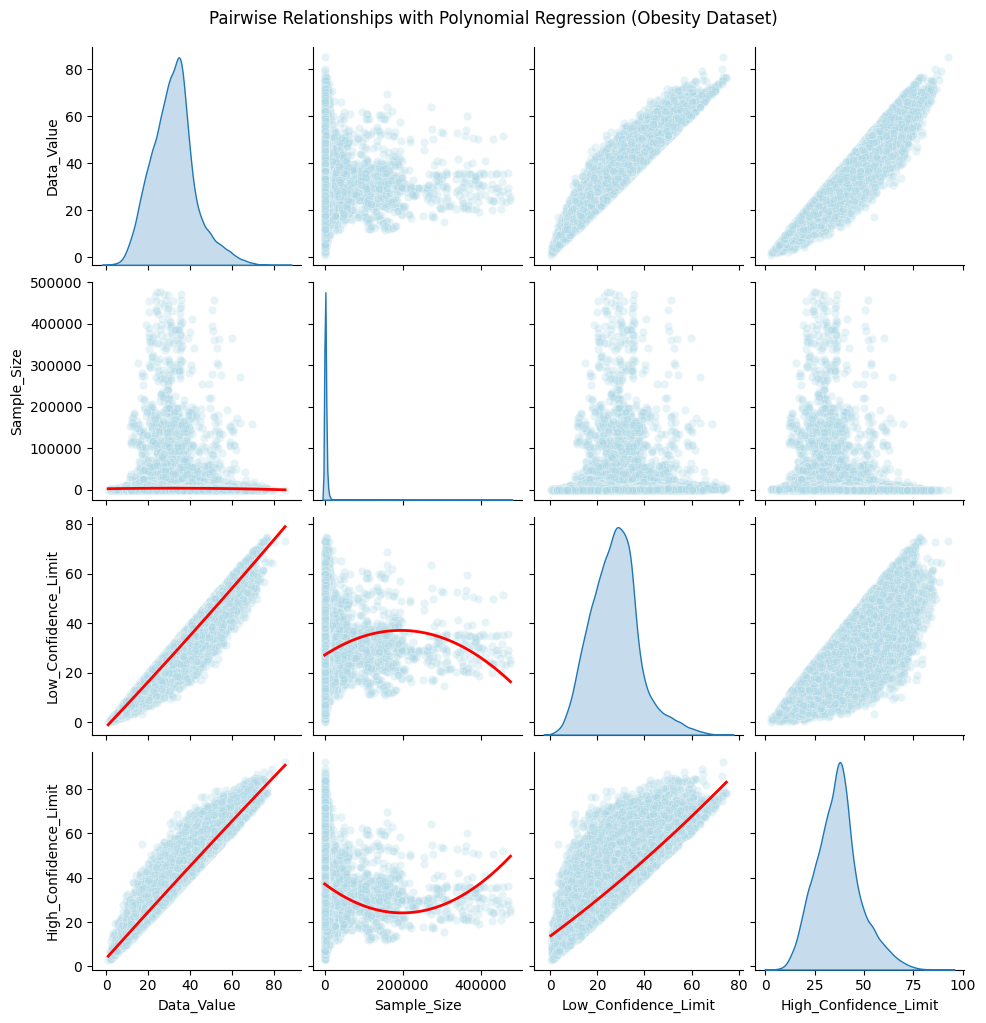

In [ ]:
# Your code here . . .

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define polynomial regression (degree 2)
def poly_reg(x, y, **kwargs):
    if len(np.unique(x)) > 2:   # Only fit if x has enough variation
        p = np.polyfit(x, y, deg=2)
        xp = np.linspace(x.min(), x.max(), 100)
        yp = np.polyval(p, xp)
        plt.plot(xp, yp, color="red", linewidth=2)

# Select numeric columns
cols_to_plot = ["Data_Value", "Sample_Size", "Low_Confidence_Limit", "High_Confidence_Limit"]
small_df = df[cols_to_plot].dropna()

# Create pair plot
sns.pairplot(
    small_df,
    plot_kws={'alpha': 0.3, 'color': 'lightblue'},  # scatter points
    diag_kind="kde"                                 # KDE on diagonal
).map_lower(poly_reg)                               # only lower triangle

# Add title
plt.suptitle("Pairwise Relationships with Polynomial Regression (Obesity Dataset)", y=1.02)
plt.show()


### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

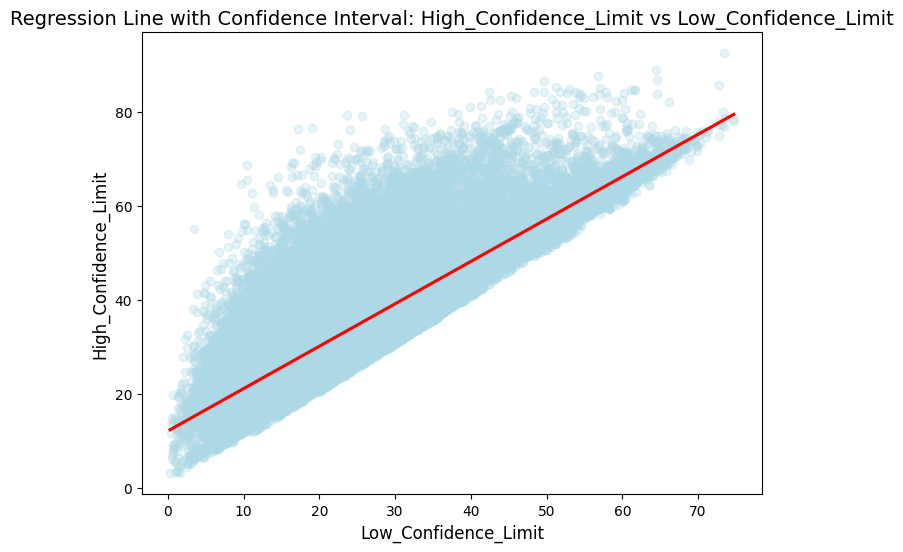

In [ ]:
# Your code here . . .
# Import again in case cell is separate
import seaborn as sns
import matplotlib.pyplot as plt

# Pick two other related features
x_col = "Low_Confidence_Limit"
y_col = "High_Confidence_Limit"

plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter_kws={'alpha':0.3, 'color':'lightblue'},  # lighter scatter
    line_kws={'color':'red'}  # regression line in red
)

plt.title(f"Regression Line with Confidence Interval: {y_col} vs {x_col}", fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.show()



### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

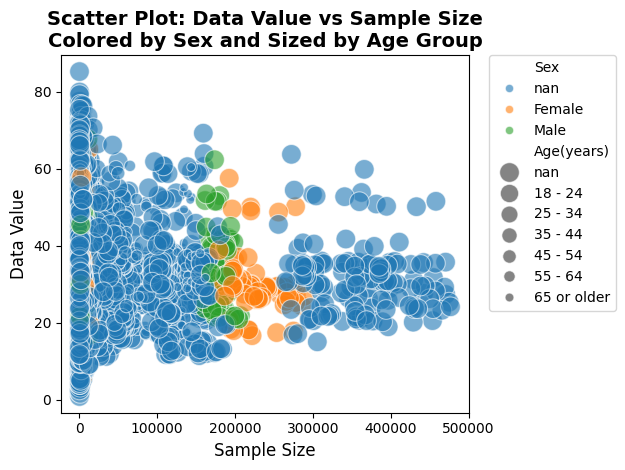

In [ ]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data to remove rows with missing values in important columns
filtered_df = df.dropna(subset=["Sex", "Age(years)", "Sample_Size", "Data_Value"])

# Scatter plot with multiple features
sns.scatterplot(
    data=filtered_df,
    x="Sample_Size",          # X-axis
    y="Data_Value",           # Y-axis
    hue="Sex",                # Color by male/female
    size="Age(years)",        # Point size by age group
    sizes=(40, 200),          # Better size scaling for readability
    alpha=0.6                 # Transparency to avoid clutter
)

# Add labels and title
plt.title("Scatter Plot: Data Value vs Sample Size\nColored by Sex and Sized by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Data Value", fontsize=12)

# Move legend outside for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()  # Adjust layout so labels/legend fit nicely
plt.show()




### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

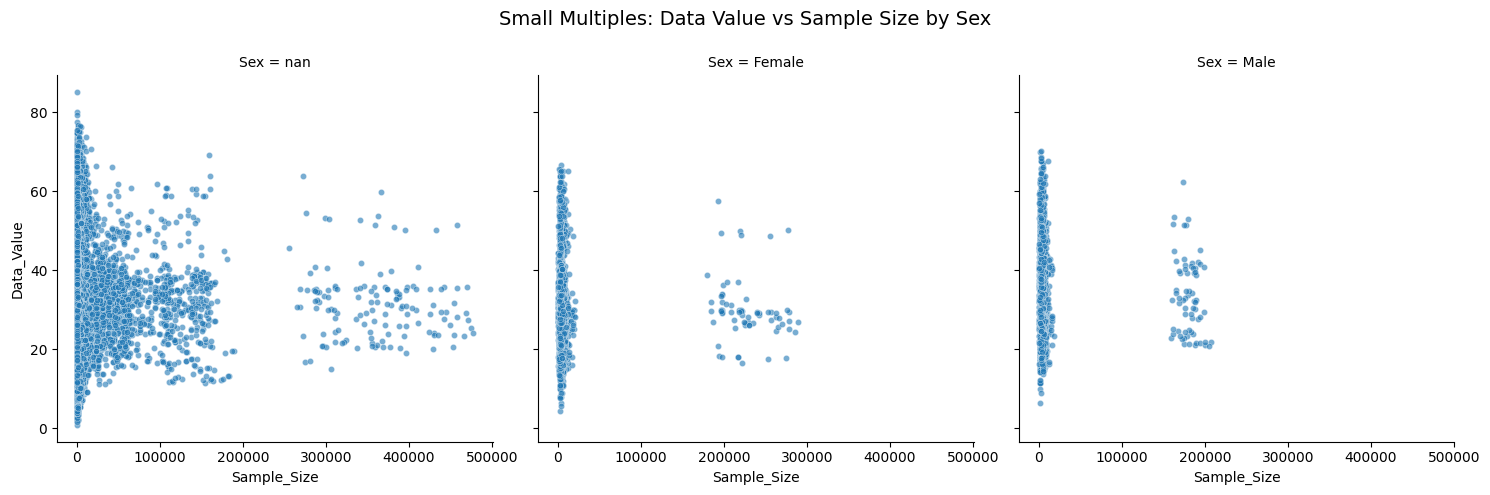

In [ ]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing Sex values
filtered_df = df.dropna(subset=["Sex", "Sample_Size", "Data_Value"])

# Small multiples plot: Data_Value vs Sample_Size, split by Sex
g = sns.relplot(
    data=filtered_df,
    x="Sample_Size",
    y="Data_Value",
    col="Sex",          # one plot per category of Sex
    col_wrap=3,         # 3 plots per row
    height=5,           # height of each subplot
    s=20,               # size of data points
    alpha=0.6           # transparency
)

# Add overall title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Small Multiples: Data Value vs Sample Size by Sex", fontsize=14)

plt.show()
